In [12]:
import numpy as np
import arviz as az
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('science')
az.style.use("ieee")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

%config InlineBackend.figure_format = 'retina'

## 2.1

In [13]:
ways = torch.tensor([0., 3, 8, 9, 0])
new_ways = ways / ways.sum()

new_ways

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

## 2.2

In [14]:
dbinom=dist.Binomial(total_count=9, probs=0.5)
dbinom.log_prob(torch.tensor(6.0)).exp()

tensor(0.1641)

## 2.3

In [15]:
# define grid
p_grid = torch.linspace(0, 1, 20)
# define prior
prior= torch.tensor([1.]).repeat(20)

# compute likelihood at each value in grid
dbinom= dist.Binomial(total_count=9, probs=p_grid)
likelihood = dbinom.log_prob(torch.tensor(6.0)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()


## 2.4

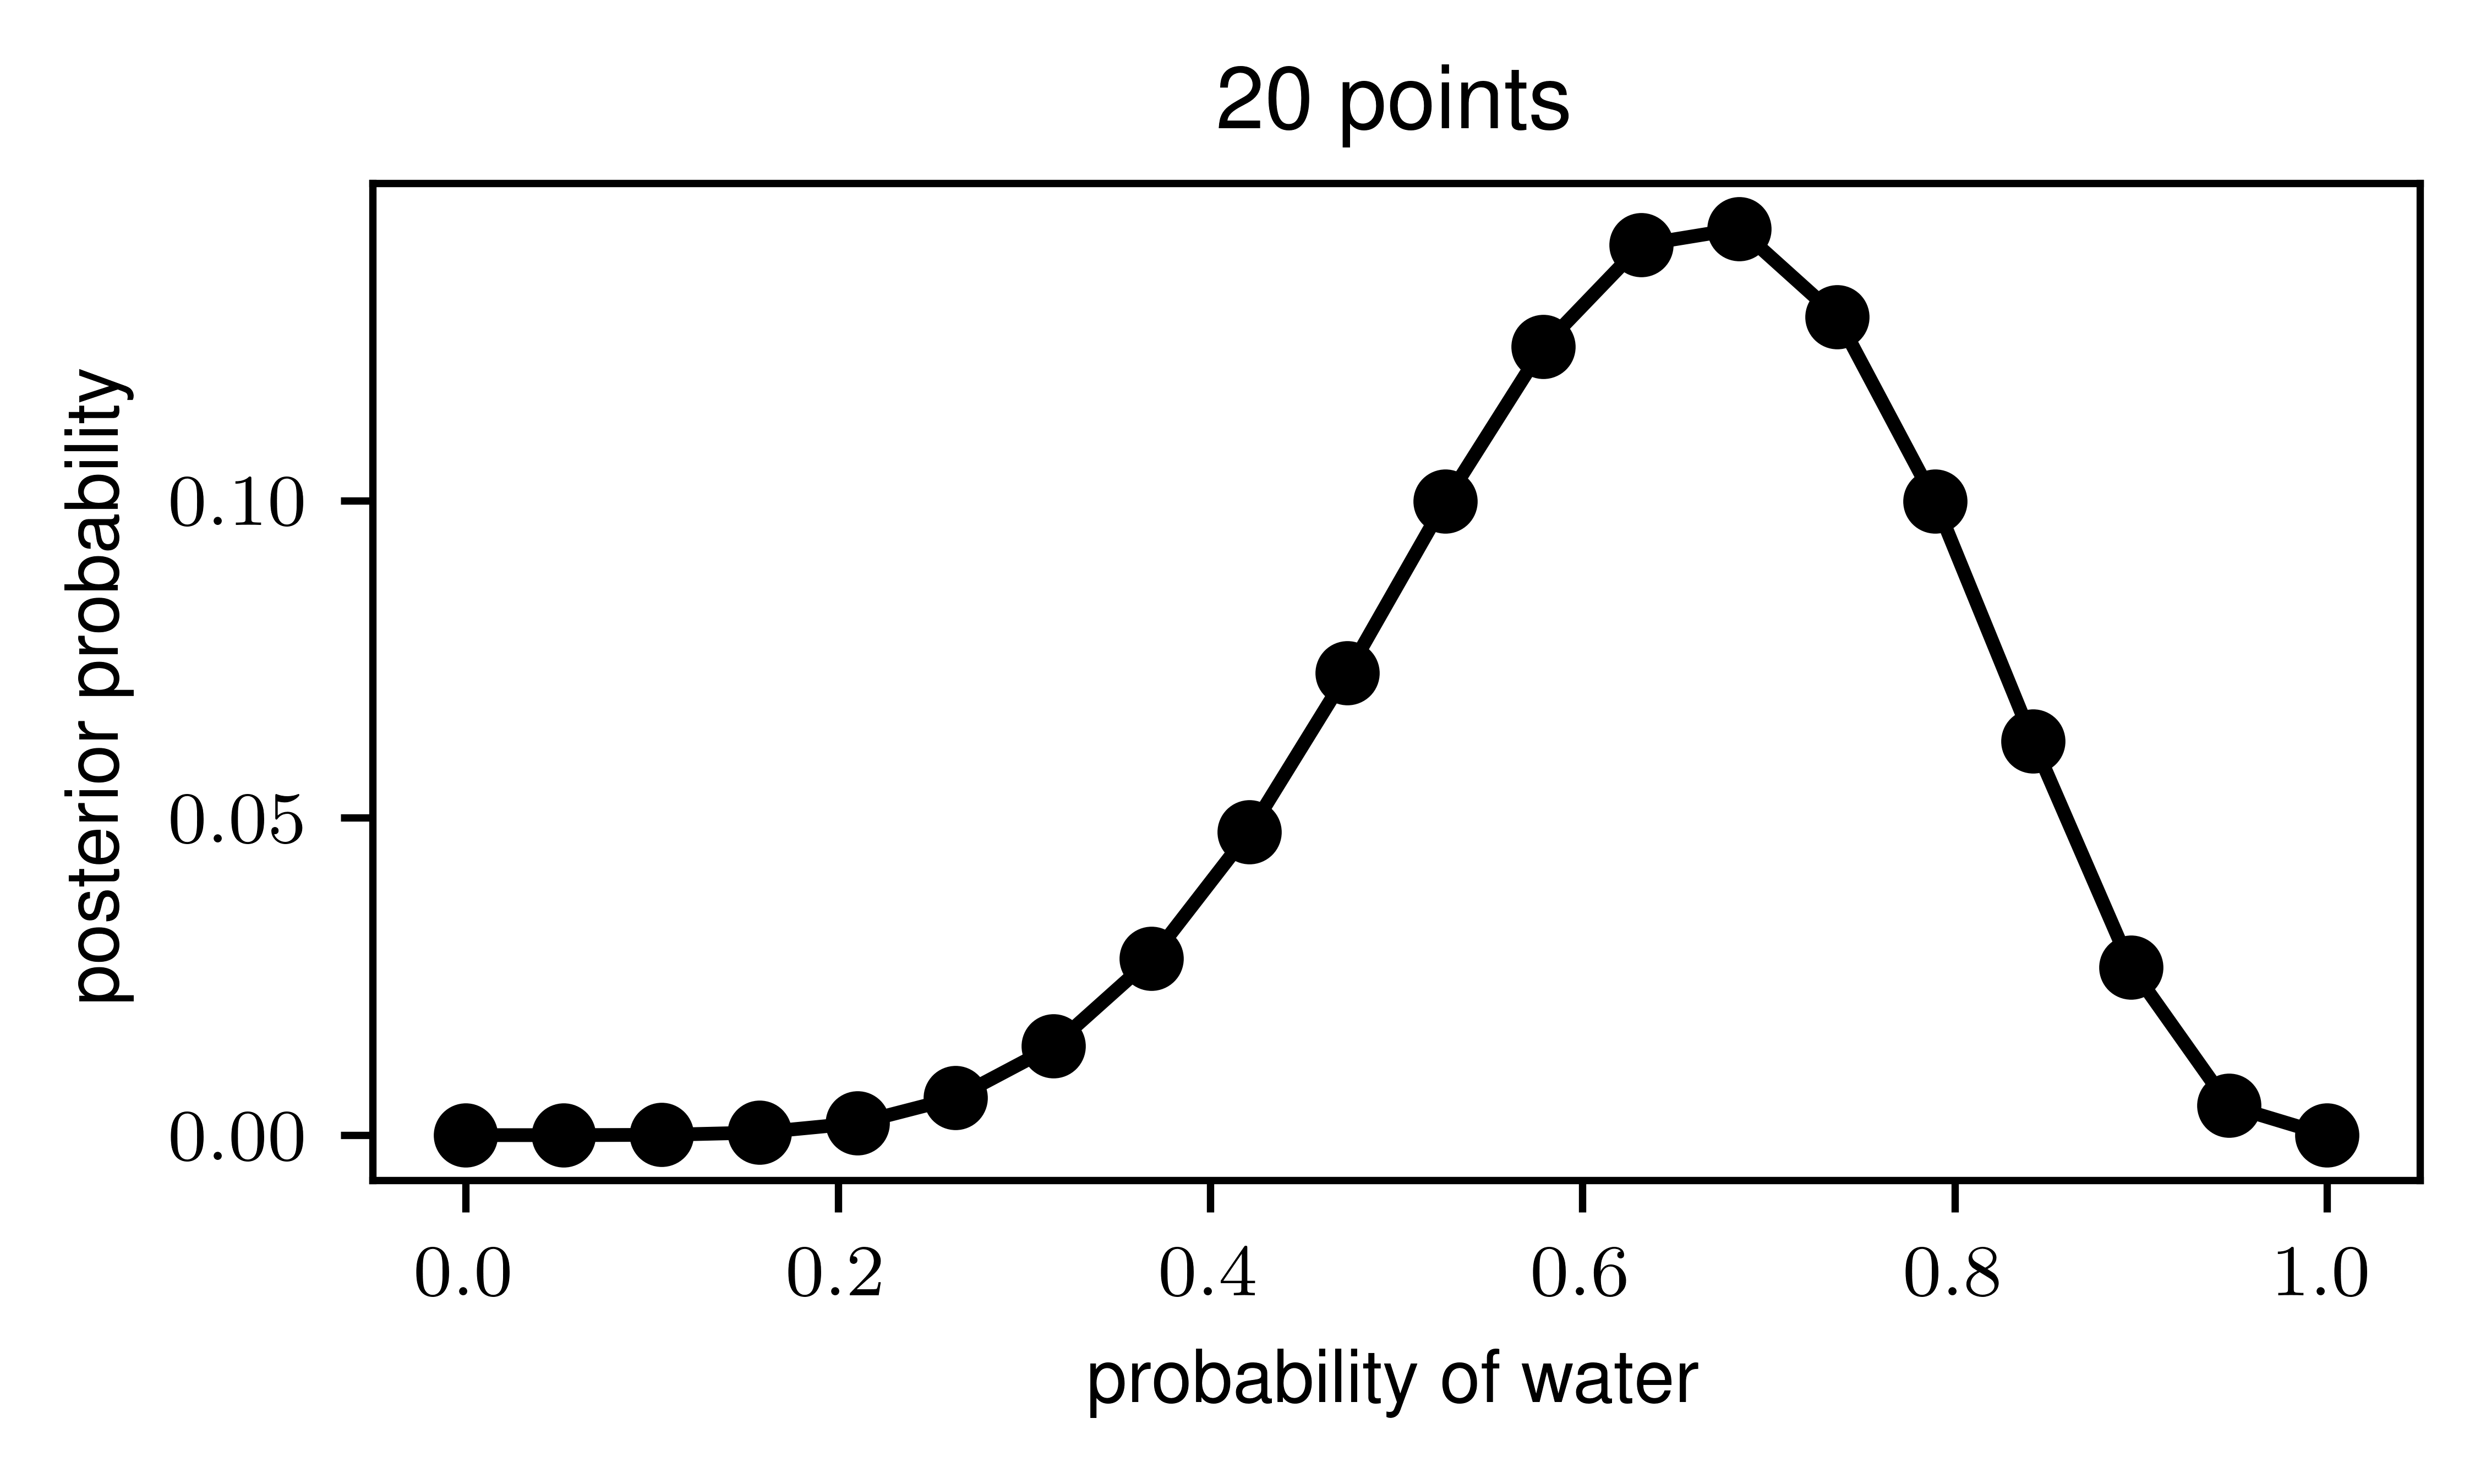

In [16]:
plt.figure(figsize=(4, 2))
plt.plot(p_grid, posterior, "-o")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("20 points");

## 2.5 

In [6]:
prior_one = torch.where(p_grid<0.5, 0., 1.0)
# compute product of likelihood and prior
unstd_posterior_one = likelihood * prior_one

# standardize the posterior, so it sums to 1
posterior_one = unstd_posterior_one / unstd_posterior_one.sum()
prior_two = torch.exp((p_grid- 0.5).abs())
unstd_posterior_two = likelihood * prior_two

# standardize the posterior, so it sums to 1
posterior_two = unstd_posterior_two / unstd_posterior_two.sum()

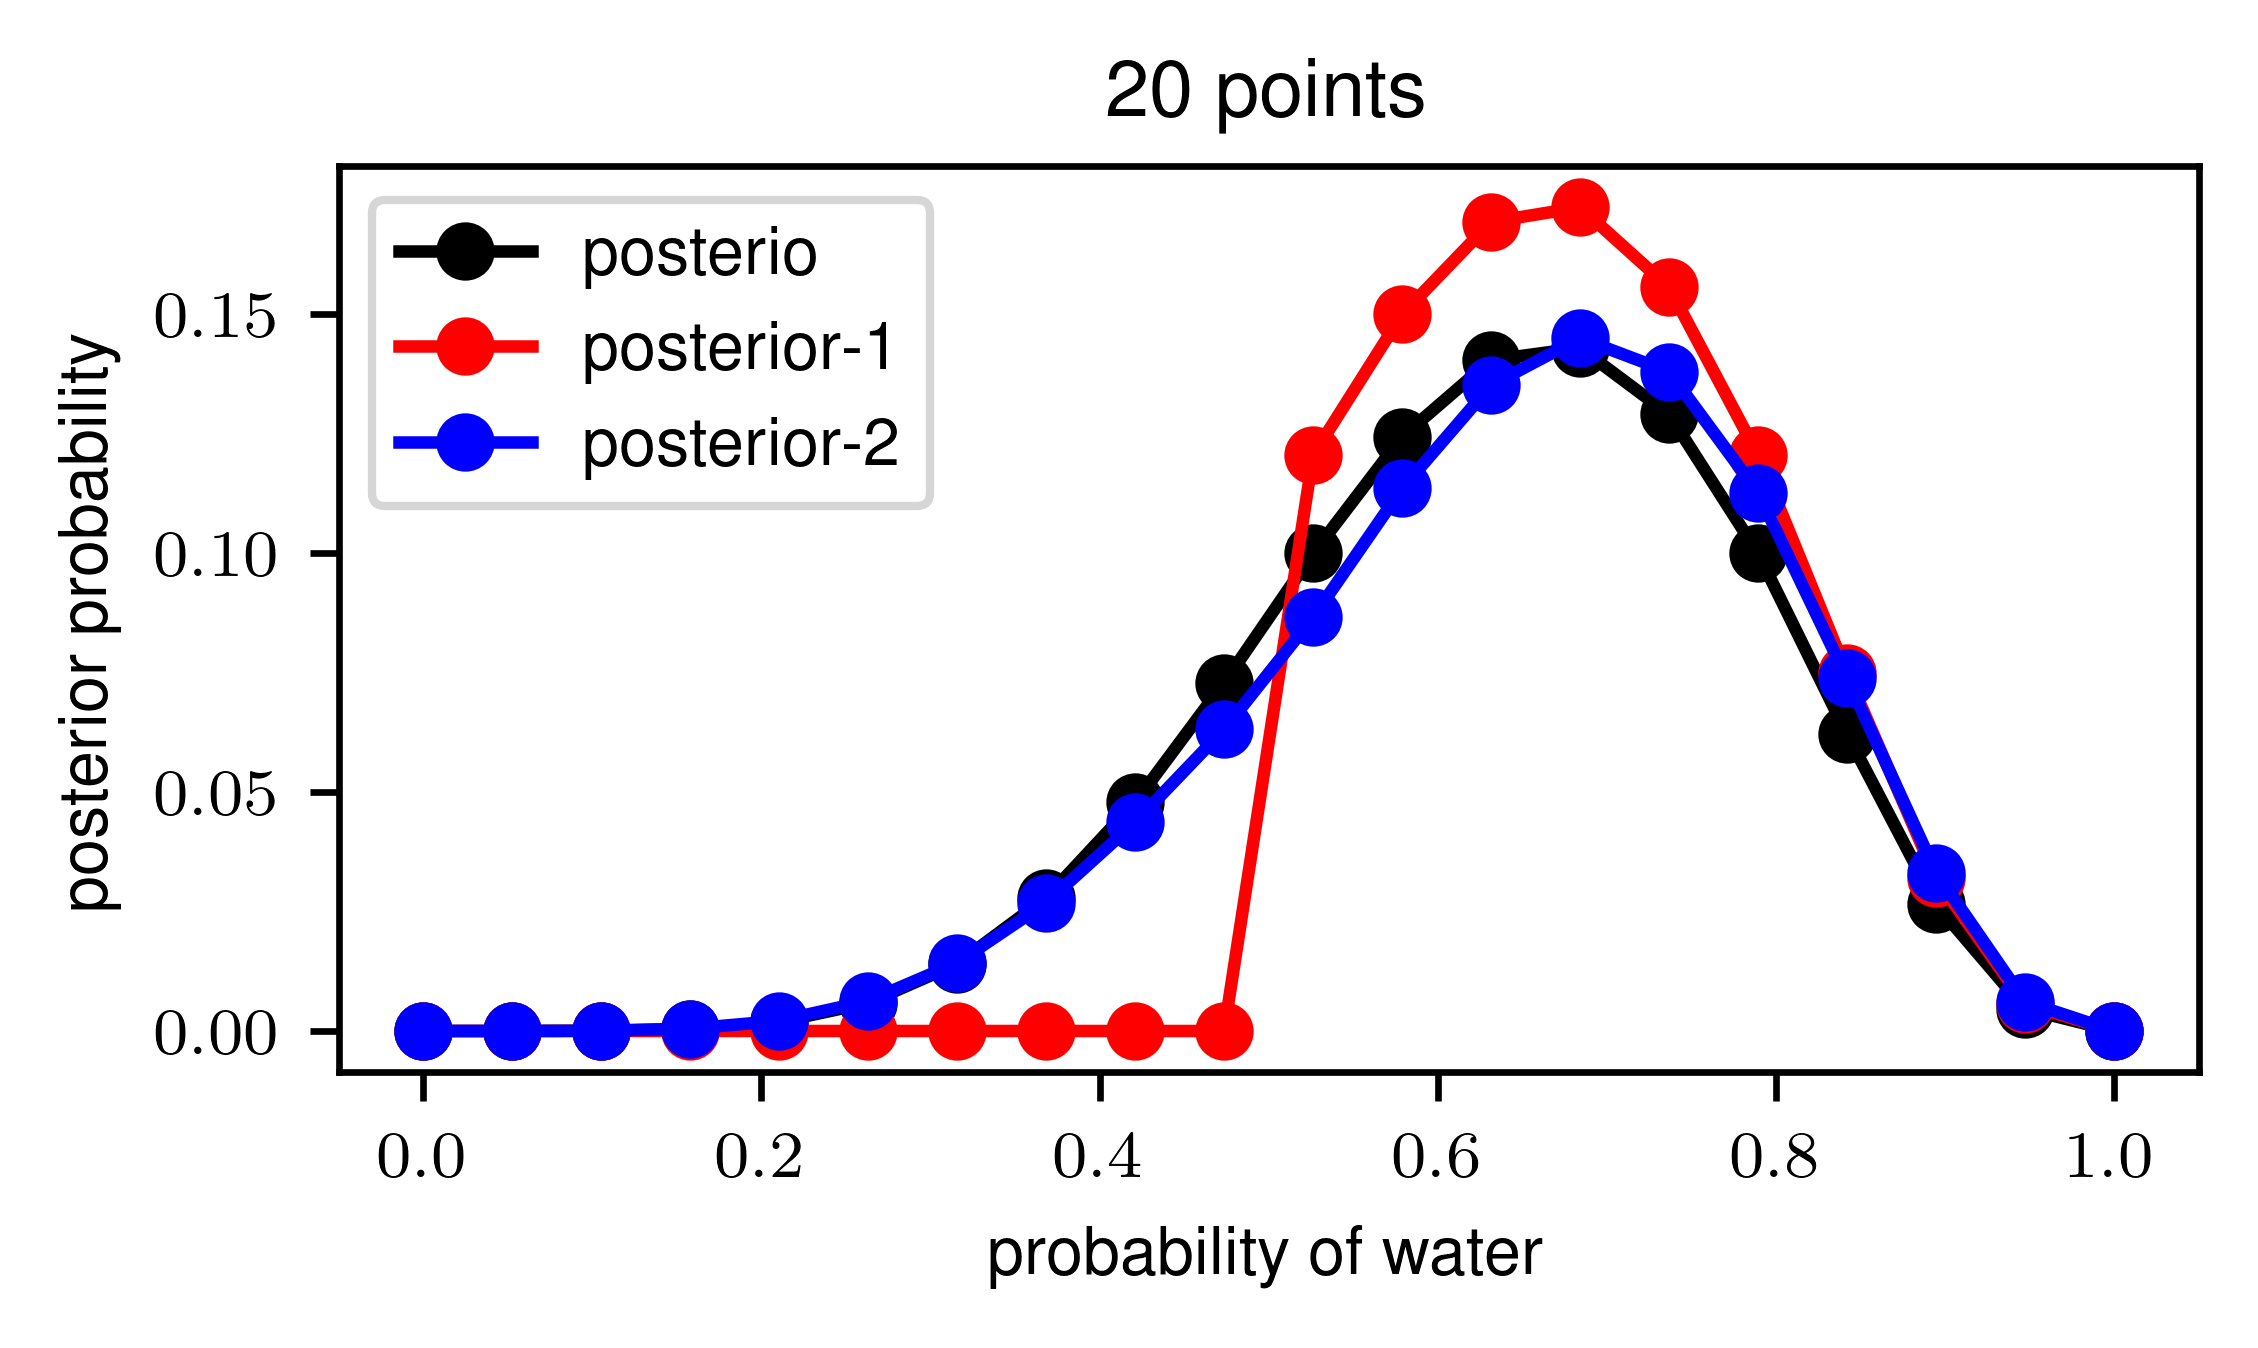

In [7]:
plt.figure(figsize=(4, 2))
plt.plot(p_grid, posterior, "-o")
plt.plot(p_grid, posterior_one, "-o")
plt.plot(p_grid, posterior_two, "-o")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.legend(['posterio','posterior-1', 'posterior-2'])
plt.title("20 points");

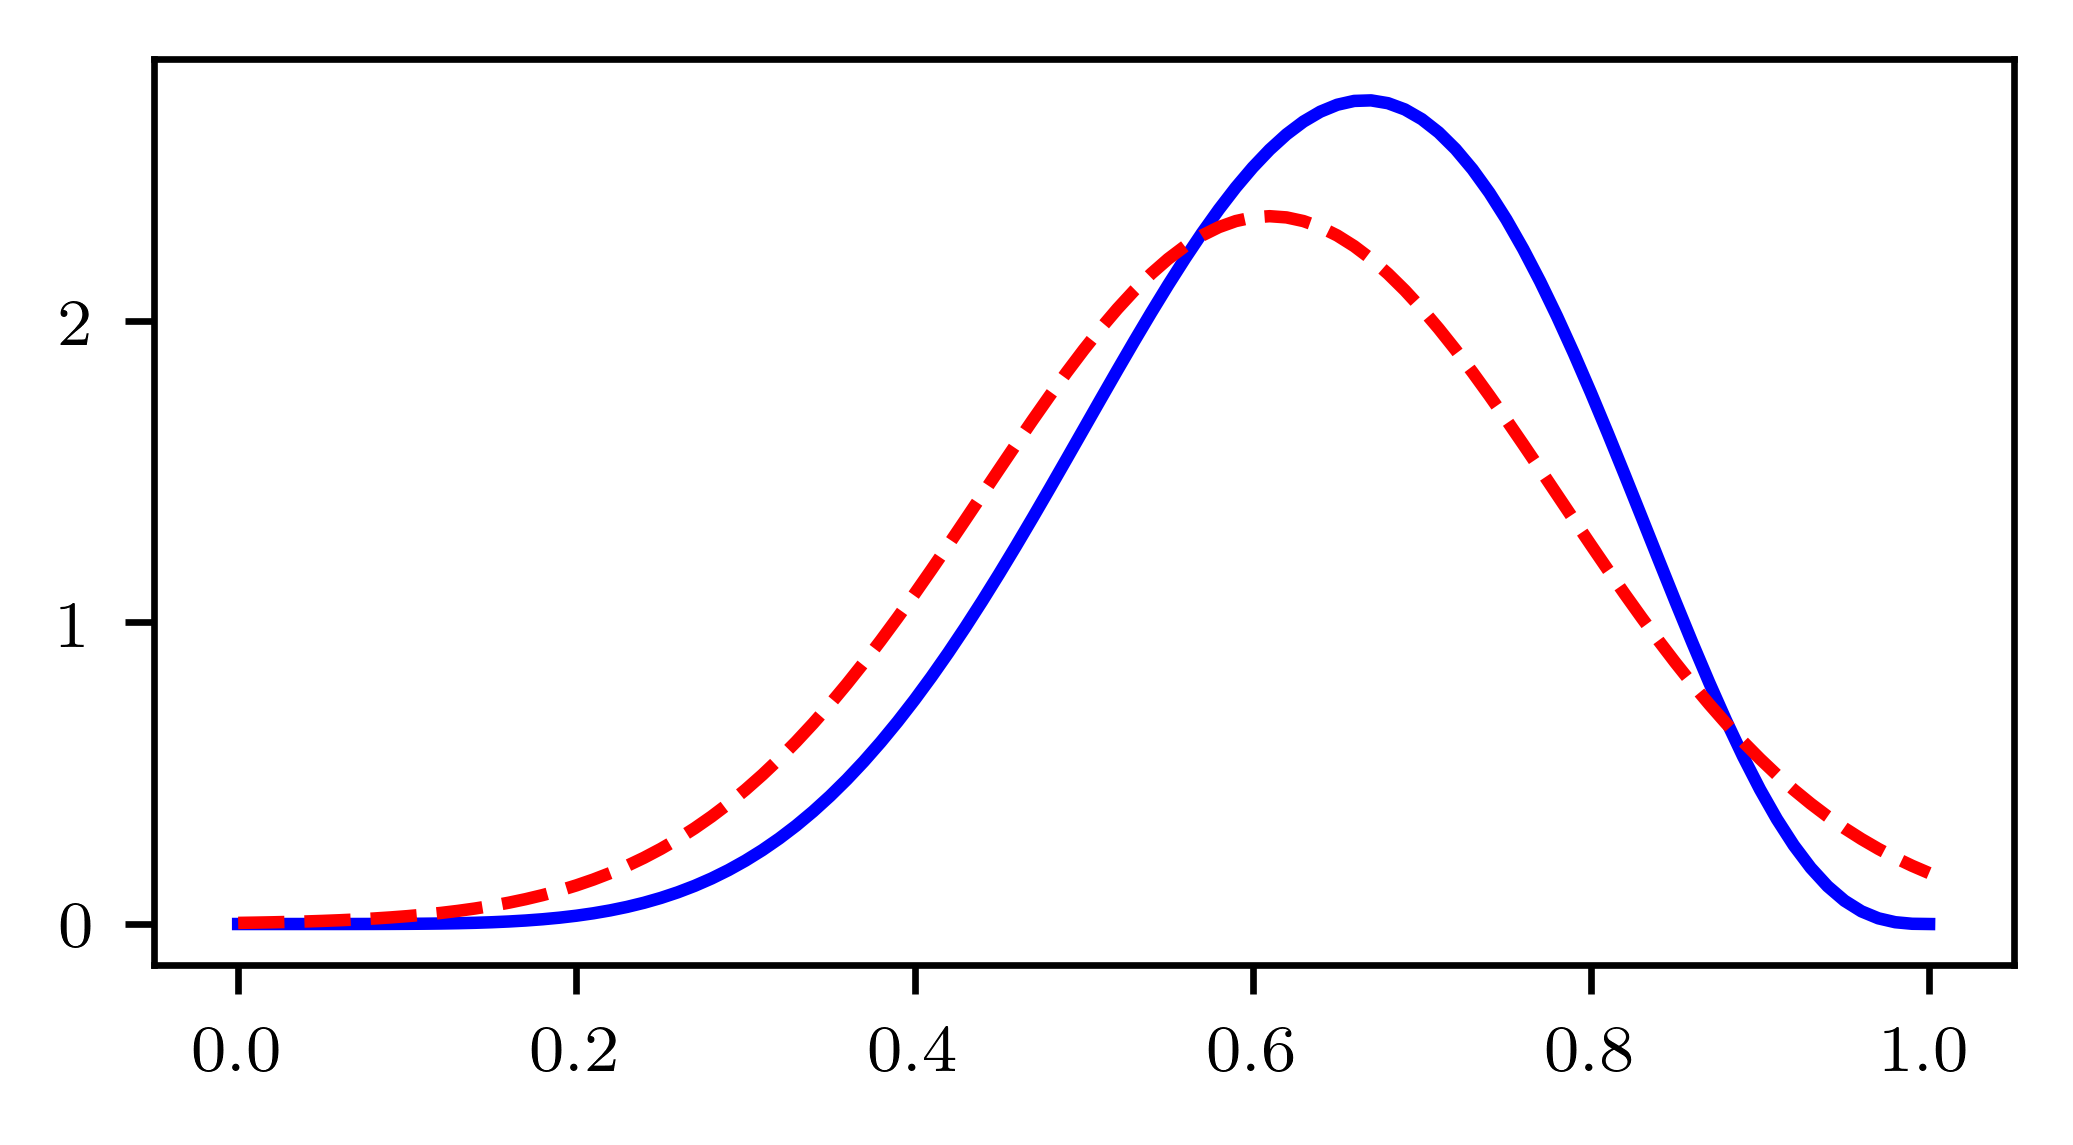

In [8]:

W = 6
L = 3
x = torch.linspace(0, 1, 101)
beta = dist.Beta(W+1, L+1)
normal = dist.Normal(0.61, 0.17)
plt.figure(figsize=(4, 2))
plt.plot(x, beta.log_prob(x).exp(), 'b-')
# values obained from quadratic approximation
plt.plot(x, normal.log_prob(x).exp(), "r--");

In [9]:
from scipy.stats import uniform

In [10]:
n_samples = 1000
p = torch.zeros(n_samples)
p[0] = 0.5
W = torch.tensor(6.0)
L = torch.tensor(3.0)
for i in range(1, n_samples):
    p_new = dist.Normal(loc=p[i - 1], scale=0.1).sample()
    if p_new < 0:
        p_new = -p_new
    if p_new > 1:
        p_new = 2 - p_new
    q0 = dist.Binomial(total_count=W+L, probs=p[i-1]).log_prob(W).exp()
    q1 = dist.Binomial(total_count=W+L, probs=p_new).log_prob(W).exp()
    if uniform.rvs(0, 1) < (q1 / q0).item():
        p[i] = p_new
    else:
        p[i] = p[i - 1]

<Figure size 2400x1200 with 0 Axes>

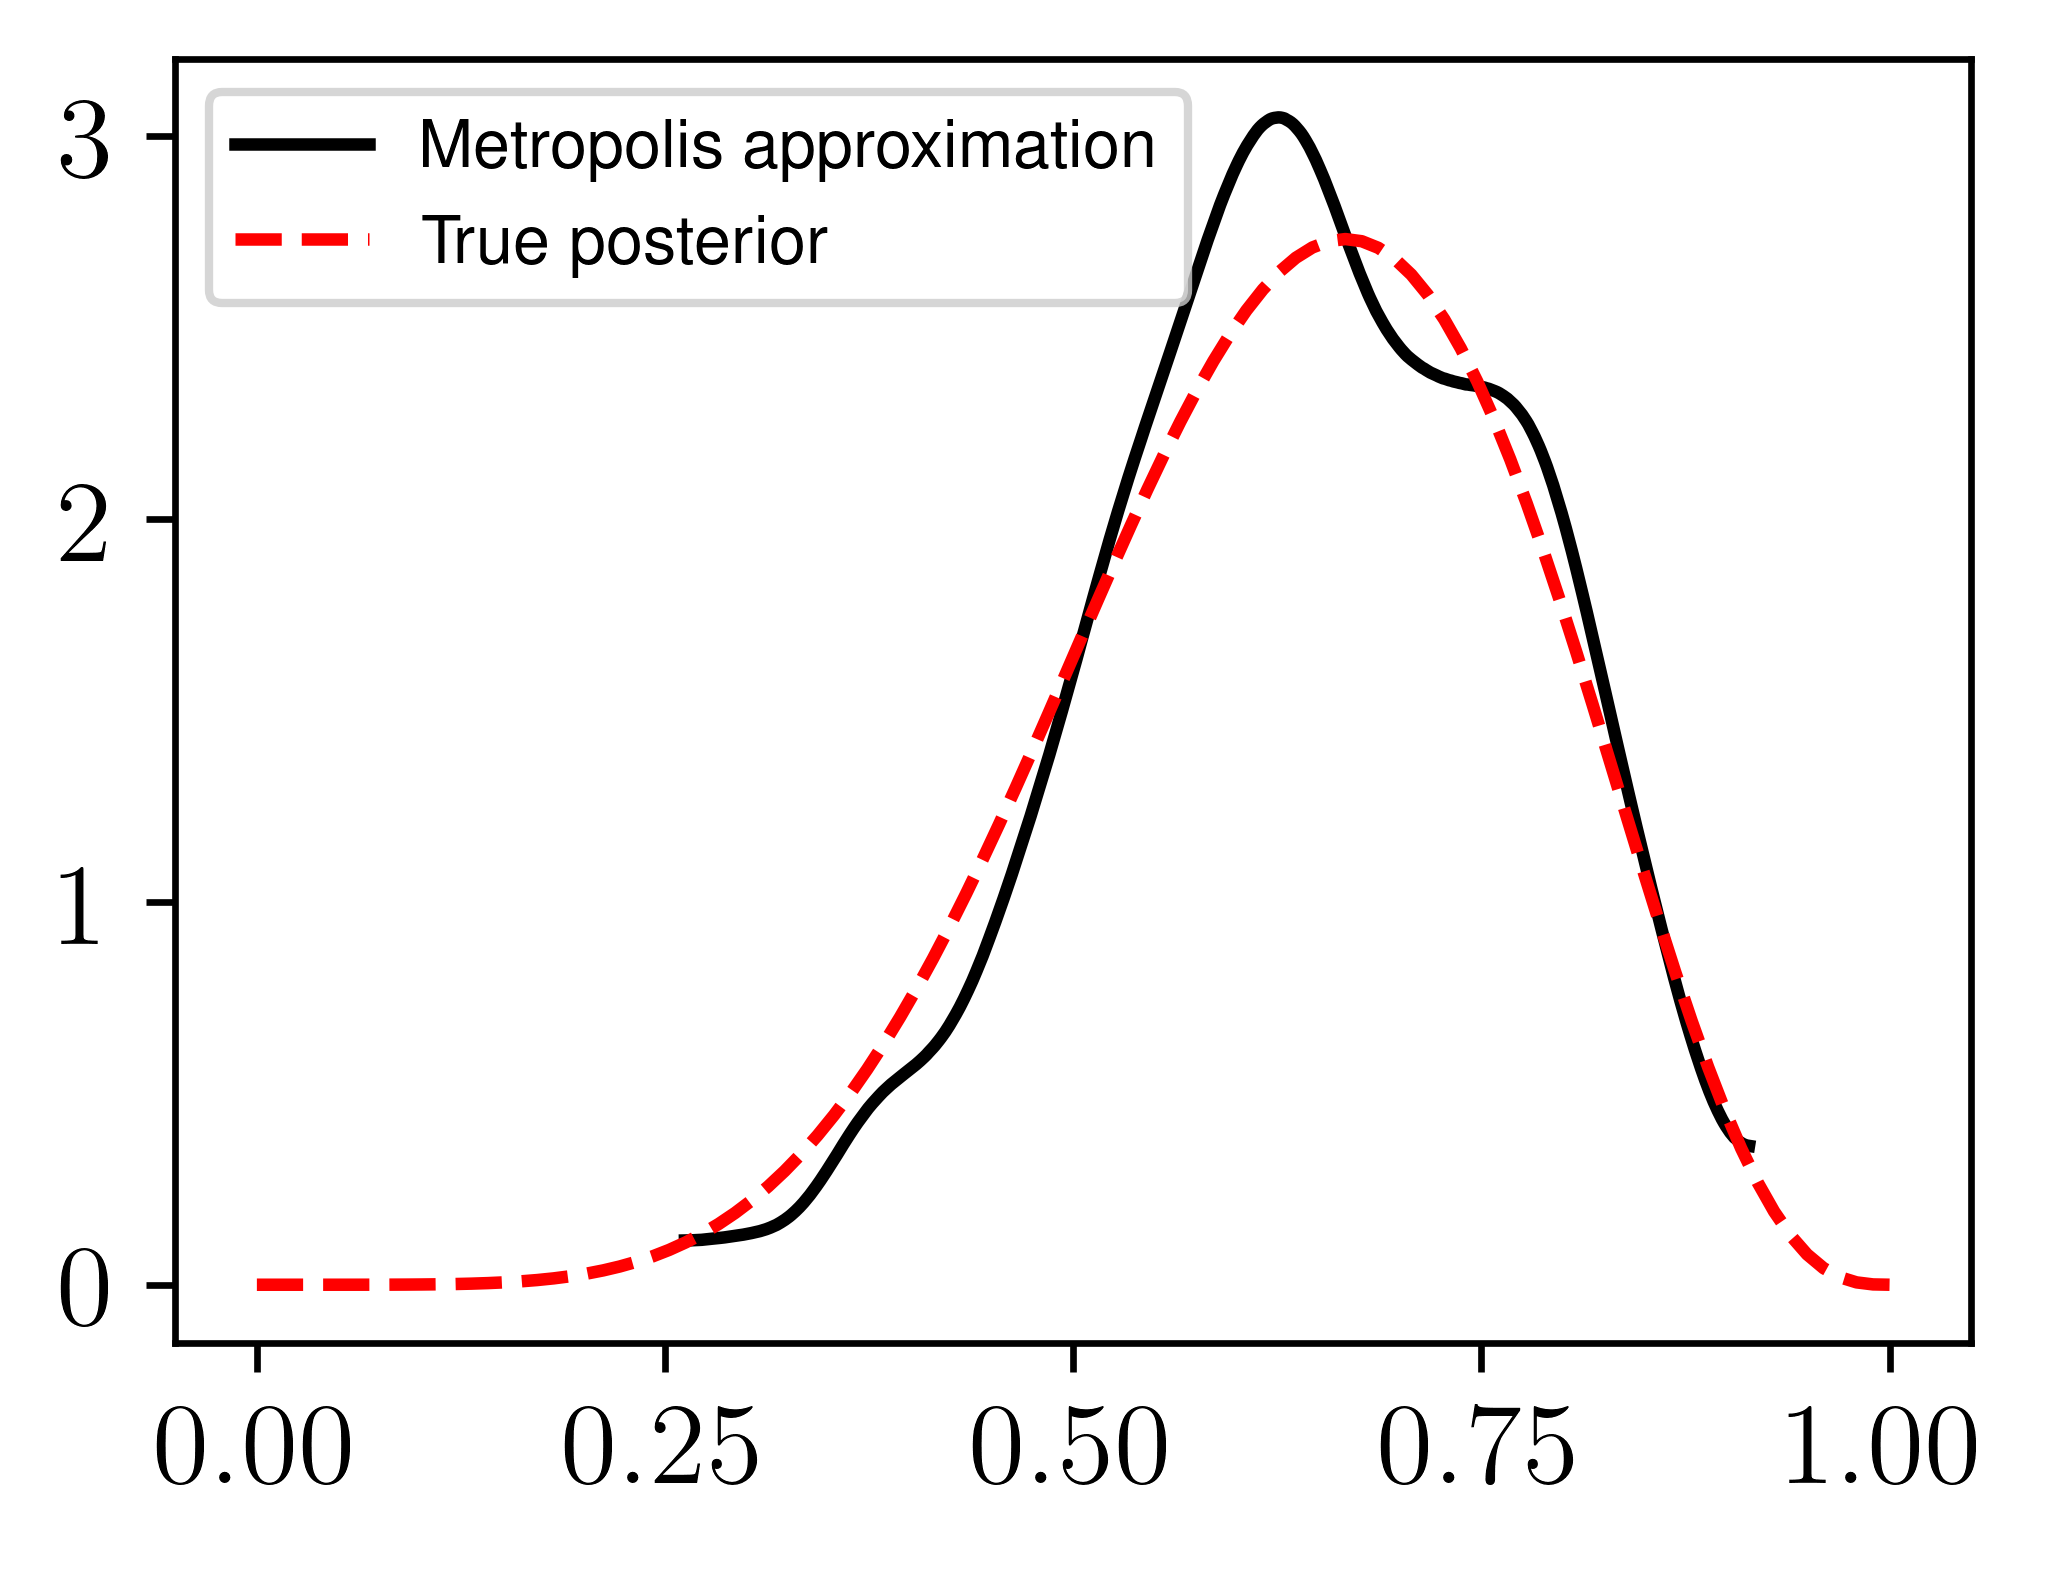

In [11]:
plt.figure(figsize=(4,2))
az.plot_kde(p, label="Metropolis approximation")
x = torch.linspace(0, 1, 100)
plt.plot(x, dist.Beta(W+1, L+1).log_prob(x).exp(), "C1", label="True posterior")
plt.legend();